In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import os
from os import path
import numpy as np

from ast import literal_eval

In [4]:
CSV_RESULTS = "./results/2019-12-23_22-28-56.csv"
df = pd.read_csv(f"{CSV_RESULTS}", index_col=0).dropna()
print(f"{len(df) - len(df.dropna().sort_values('val_loss'))} NA Rows")

0 NA Rows


In [5]:
if not path.isdir('./results'): os.mkdir("./results")

In [43]:
NEW_LINE = '\n'
BK = '/'
print(
    f"\tDATASETS: \n"
    f"{NEW_LINE.join([i.split(BK)[-1] for i in df['dataset'].unique()])}\n\n"

    f"\tMODELS: \n"
    f"{NEW_LINE.join(df['model_name'].unique())}\n\n"

    f"\tLOSS_FNS: \n"
    f"{NEW_LINE.join(df['loss_fn'].unique())}\n\n"

    f"\tOPTIMS: \n"
    f"{NEW_LINE.join(df['optim'].unique())}\n\n"
    
    f"\tOPTIMS: \n"
    f"{NEW_LINE.join(df['optim'].unique())}"
)

	DATASETS: 
VOC_FORMS_RGB
VOC_FORMS_RGB_AEROPLANE

	MODELS: 
MLP
SMALLER_MLP_2
SMALLER_MLP_3
SMALLER_MLP_3_3
PERCEPTRON
RESNET_34

	LOSS_FNS: 
L1LOSS

	OPTIMS: 
ADAM
SGD

	OPTIMS: 
ADAM
SGD


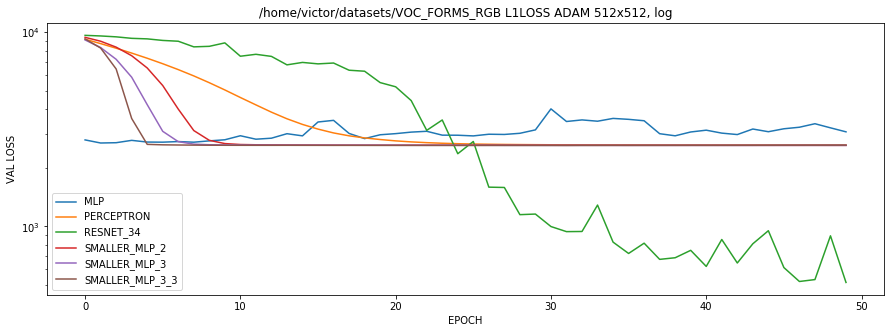

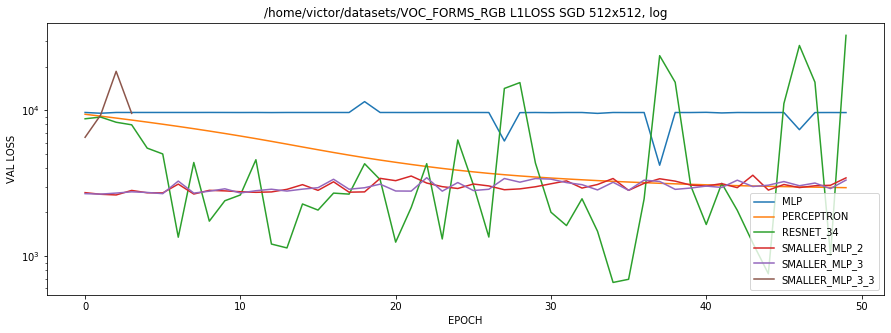

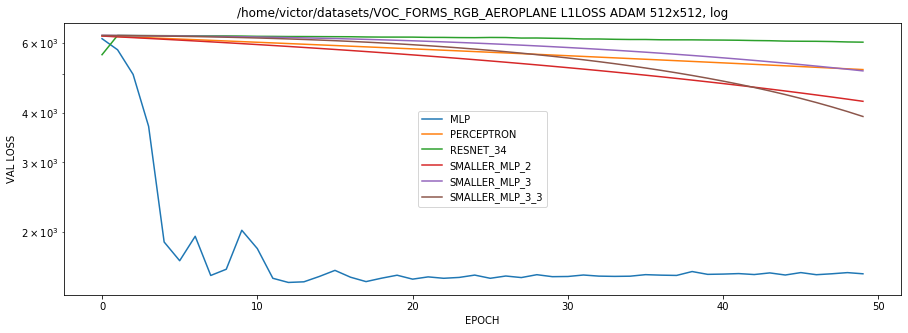

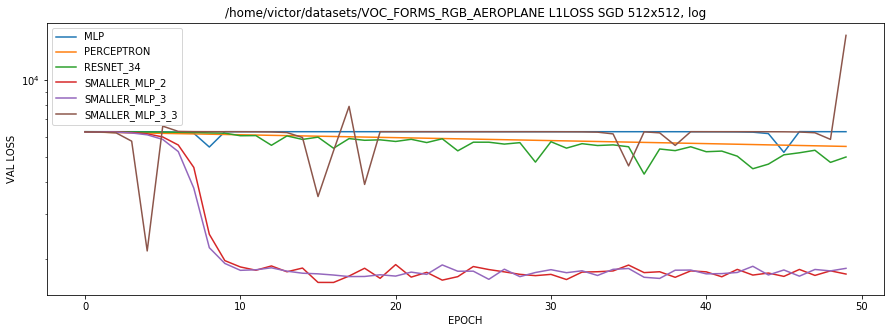

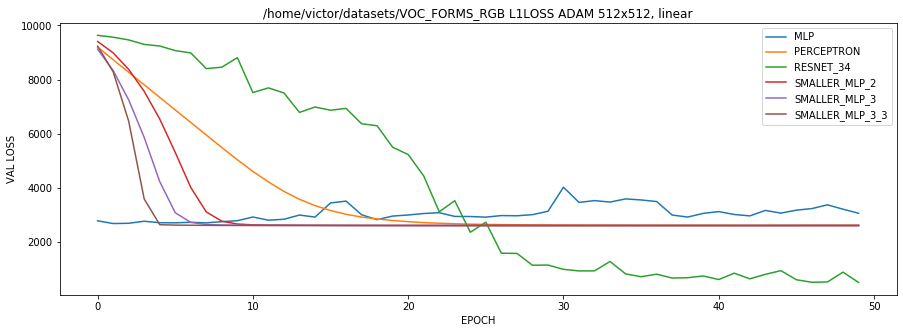

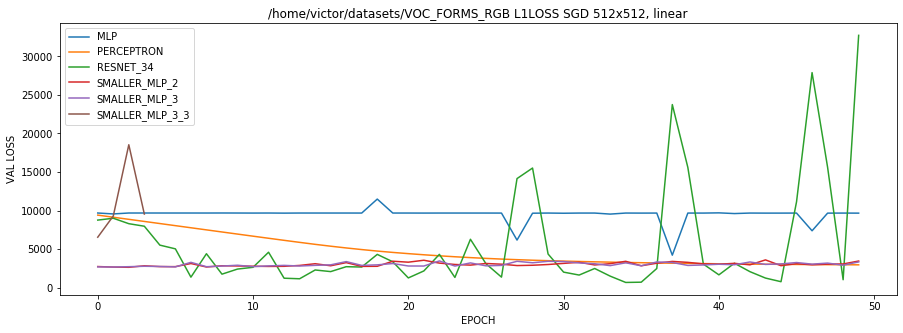

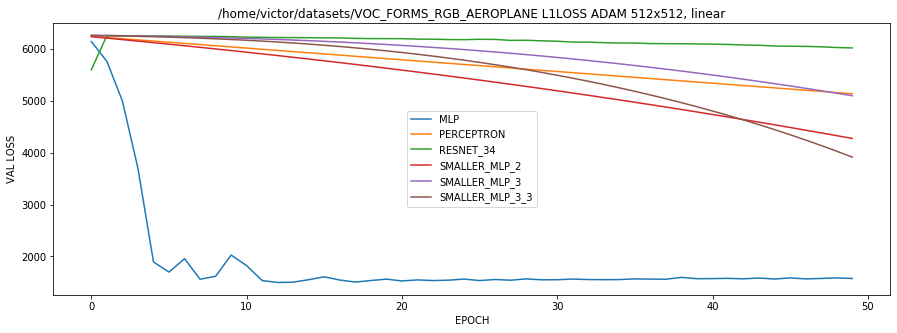

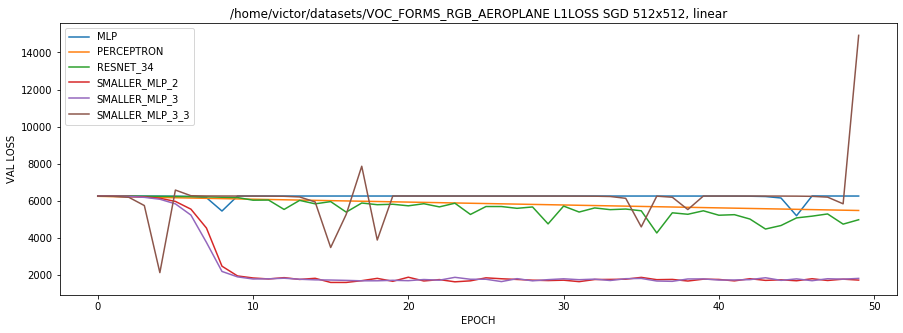

In [44]:
for scale in ['log', 'linear']:
    for dt, dt_group in df.groupby(['dataset', 'loss_fn', 'optim']):
        plt.figure(figsize=(15, 5))
        for i, group in dt_group.groupby(['model_name']):
            label = f"{i}"
            plt.plot(group["epoch"], group["val_loss_avg"], label=f"{label}")
        plt.title(f'{dt[0]} {dt[1]} {dt[2]} 512x512, {scale}')
        plt.xlabel('EPOCH')
        plt.ylabel('VAL LOSS')
        plt.legend()
        results_dest = f"./results/{CSV_RESULTS}/not_normalized"
        if not path.isdir(results_dest): os.makedirs(results_dest)
        plt.yscale(scale)
        plt.show(f'{results_dest}_val_losses.png')

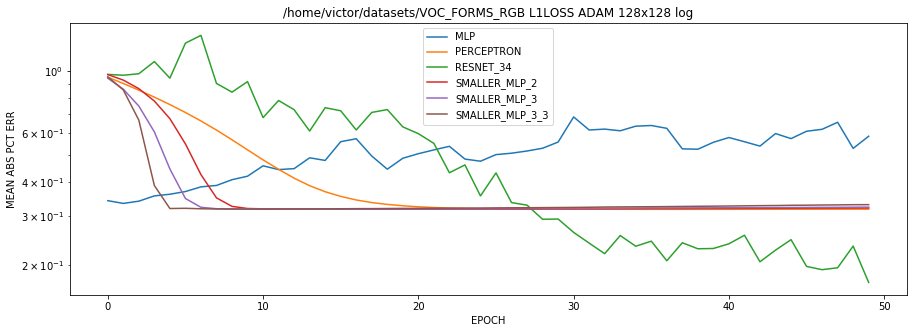

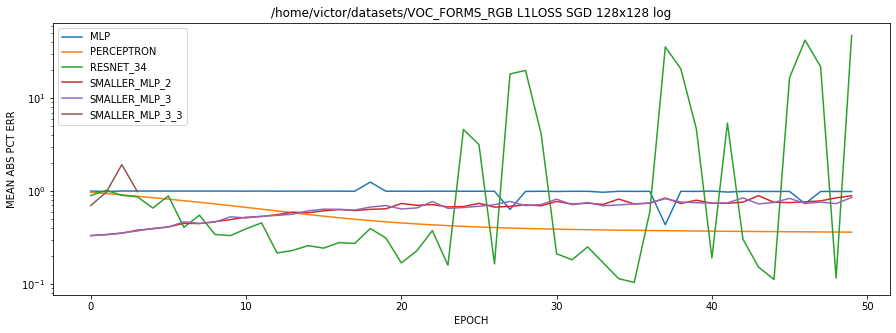

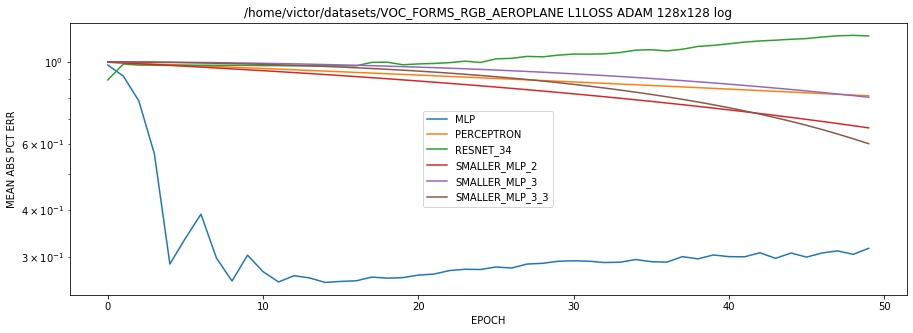

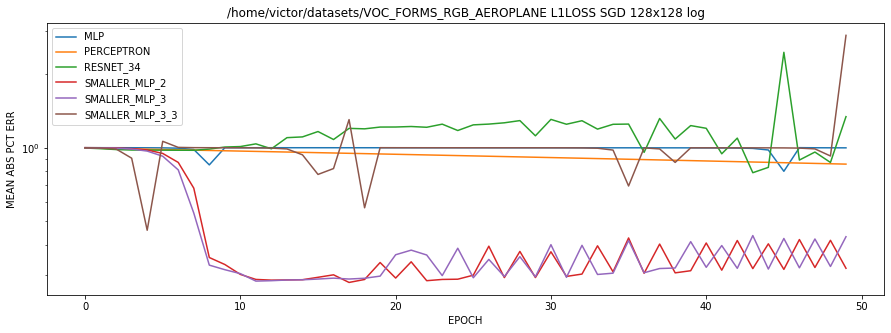

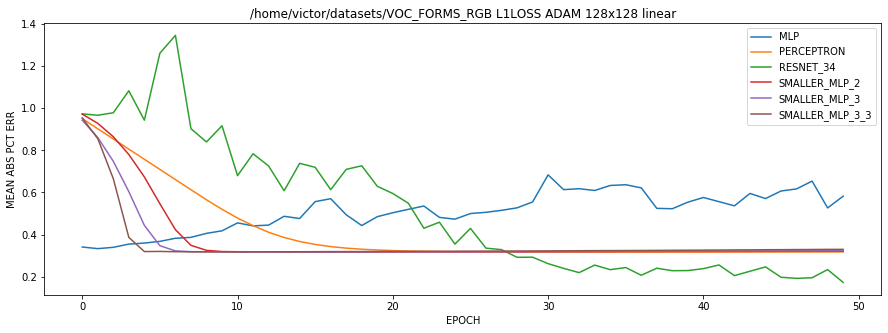

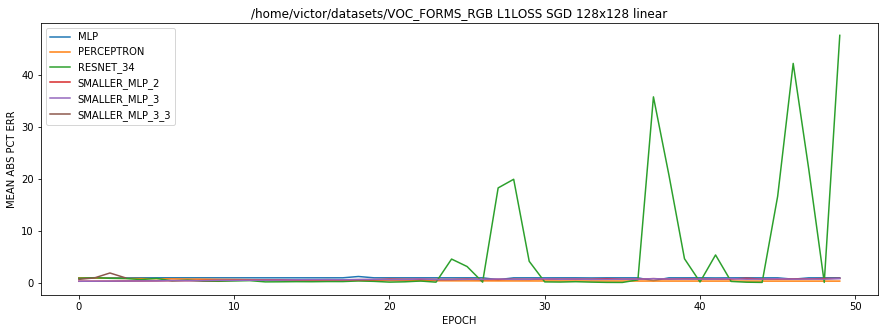

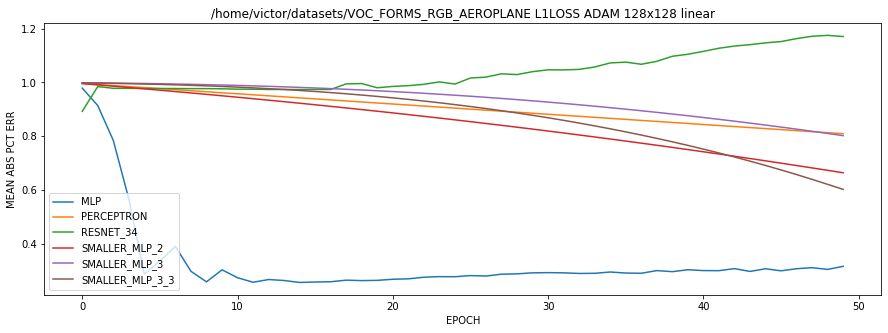

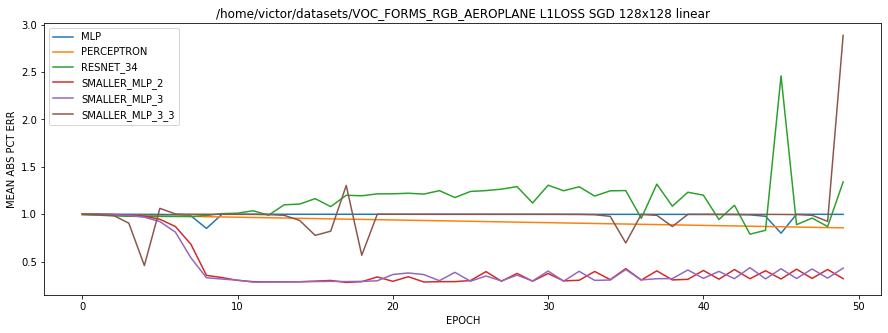

In [47]:
for scale in ['log', 'linear']:
    for dt, dt_group in df.groupby(['dataset', 'loss_fn', 'optim']):
        plt.figure(figsize=(15, 5))
        for i, group in dt_group.groupby(['model_name']):
            label = f"{i}"
            plt.plot(group["epoch"], group["pct_error_avg"], label=f"{label}")
        plt.title(f'{dt[0]} {dt[1]} {dt[2]} 128x128 {scale}')
        plt.xlabel('EPOCH')
        plt.ylabel('MEAN ABS PCT ERR')
        plt.legend()
        results_dest = f"./results/{CSV_RESULTS}/not_normalized"
        if not path.isdir(results_dest): os.makedirs(results_dest)
        plt.yscale(scale)
        plt.show(f'{results_dest}_val_losses.png')

In [46]:
df_count = df[df["dataset"].str.contains("COUNT")].copy()
df_pct = df[df["dataset"].str.contains("PCT")].copy()

df_count_l1 = df_count[df_count["loss_fn"] == "L1LOSS"].copy() 
df_count_l1["normalized_val_loss_avg"] = df_count_l1["val_loss_avg"] / 1024

df_count_mse = df_count[df_count["loss_fn"] == "MSELOSS"].copy() 
df_count_mse["normalized_val_loss_avg"] = (df_count_mse["val_loss_avg"] ** (1/2)) / 1024

df_normalized_results = pd.concat([df_count_l1, df_count_mse, df_pct], sort=False)
df_normalized_results.sort_values(by="normalized_val_loss_avg", ascending=False)

,model_name,optim,loss_fn,dataset,epoch,train_loss,val_loss,train_loss_avg,val_loss_avg,pct_error_avg,normalized_val_loss_avg


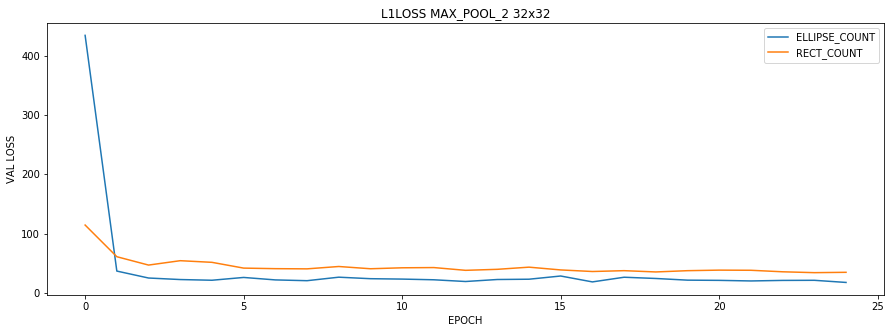

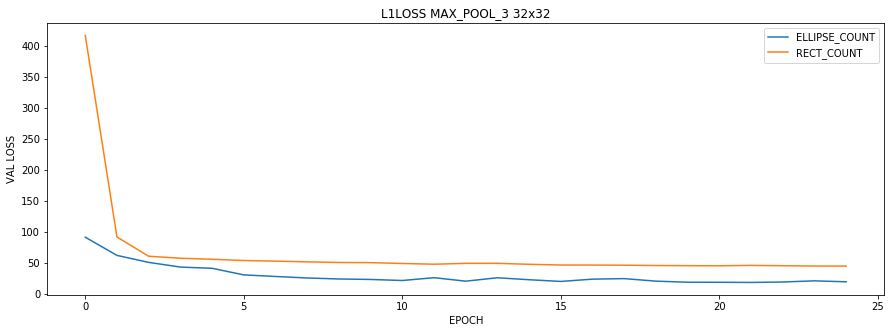

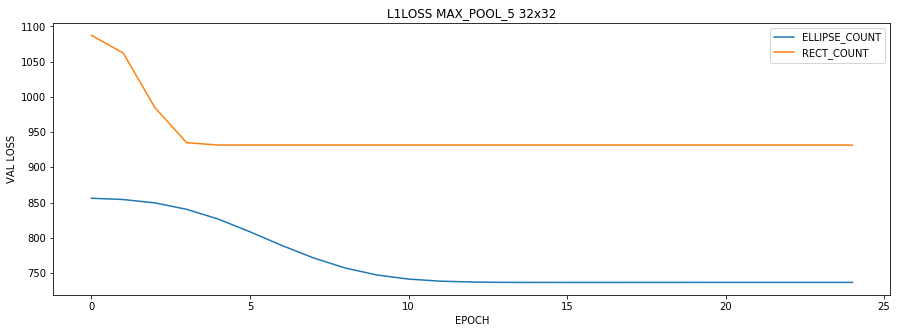

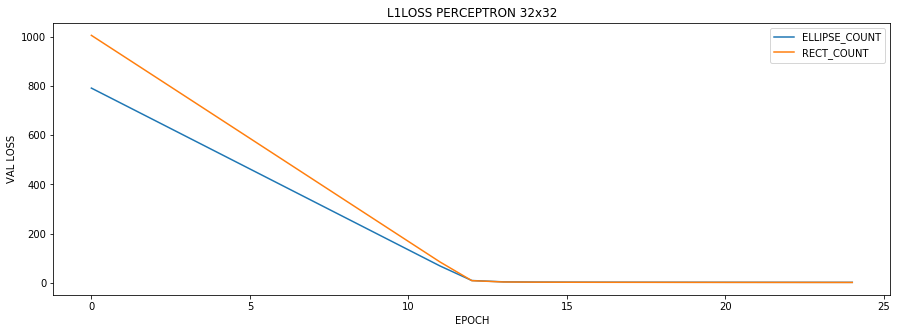

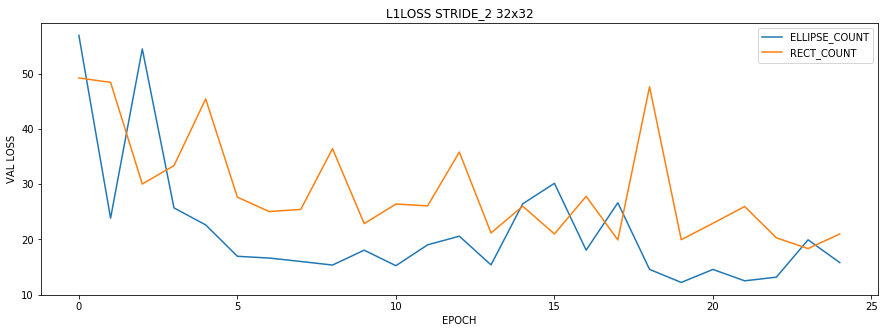

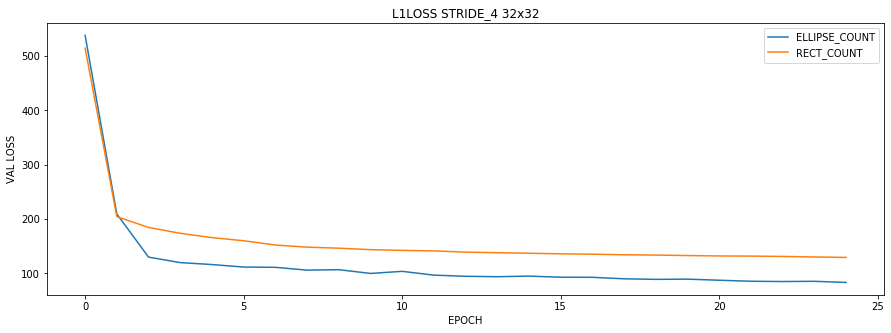

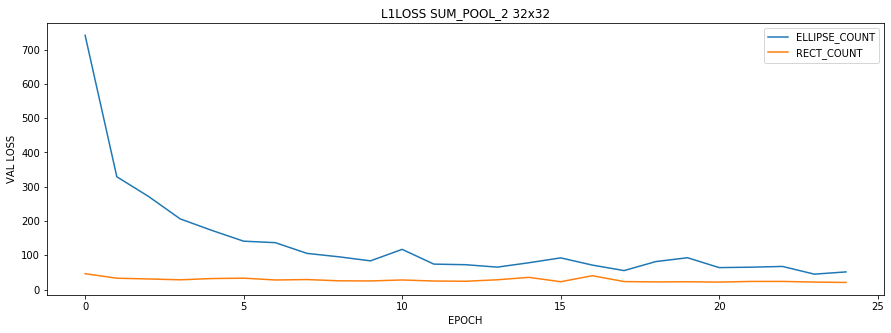

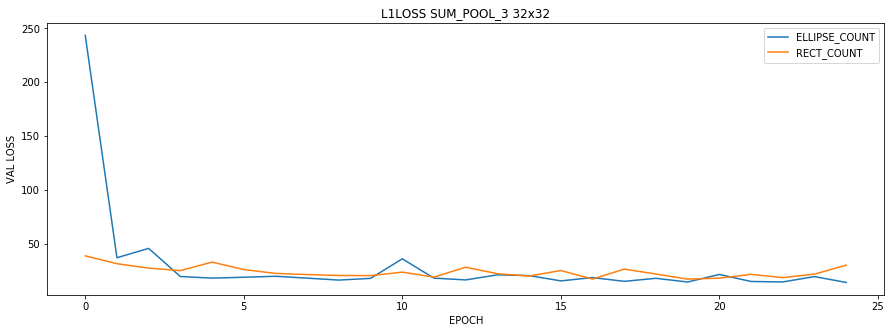

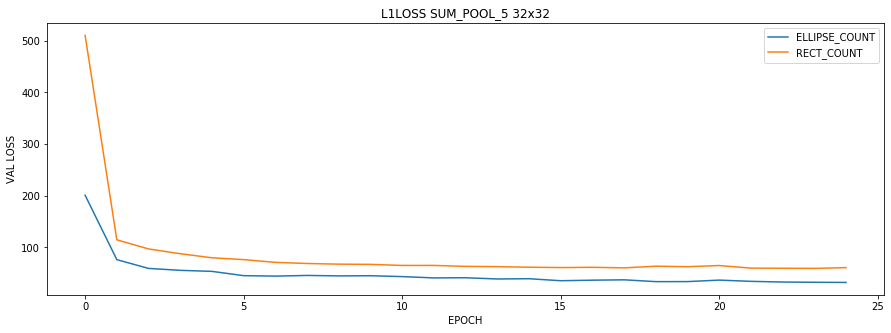

In [9]:
for dt, dt_group in df_normalized_results.groupby(['loss_fn', 'model_name']):
    plt.figure(figsize=(15, 5))
    for i, group in dt_group.groupby(['dataset']):
        label = f"{i}"
        #if "COUNT" in i: plt.plot(group["epoch"], group["normalized_val_loss_avg"], label=f"{label}-NORMALIZED_FROM_COUNT")
        #else           : 
        plt.plot(group["epoch"], group["val_loss_avg"], label=f"{label}")
    
    plt.title(f'{dt[0]} {dt[1]} 32x32')
    plt.xlabel('EPOCH')
    plt.ylabel('VAL LOSS')
    plt.legend()
    results_dest = f"./results/{CSV_RESULTS}/normalized"
    if not path.isdir(results_dest): os.makedirs(results_dest)
    plt.savefig(f'{results_dest}/{dt[0]}_{dt[1]}_val_losses_more_epochs_NORMALIZED.png')

In [44]:
df_reduced = pd.DataFrame(columns=["model_name", "loss_fn", "dataset", "optim", "min_val_loss_row", "epoch"])
for i, group in df_normalized_results.groupby(["dataset", "model_name", "loss_fn", "optim"]):
    is_pct = "PCT" in i[0]
    if is_pct: min_val_loss_idx = group["val_loss_avg"].idxmin() 
    else              : min_val_loss_idx = group["normalized_val_loss_avg"].idxmin()
    min_val_loss_row = group.loc[min_val_loss_idx]
    min_val_loss_row = pd.Series({
        "model_name"       : min_val_loss_row.model_name,
        "loss_fn"          : min_val_loss_row.loss_fn,
        "dataset"   : min_val_loss_row.dataset,
        "optim"            : min_val_loss_row.optim,
        "epoch"            : min_val_loss_row.epoch,
        "min_val_loss_row" : min_val_loss_row.val_loss_avg # if is_pct else min_val_loss_row.normalized_val_loss_avg
    })
    df_reduced = df_reduced.append(min_val_loss_row, ignore_index=True)

for dt, group in df_reduced.sort_values(by=["dataset", "min_val_loss_row"]).groupby('dataset'):
    group.to_csv(f"./results/{DATE}_FULL_RESULTS/{dt}_best_.csv")

ELLIPSE_COUNT
RECT_COUNT


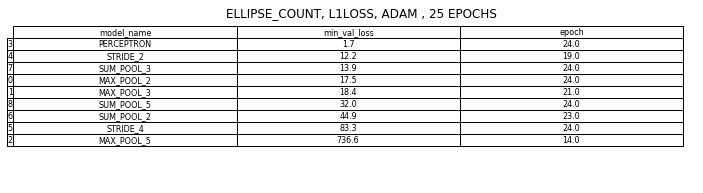

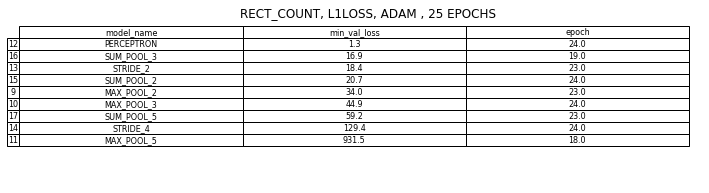

In [67]:
for i, d in df_reduced.sort_values(by="min_val_loss_row").groupby('dataset'):
    fig, ax = plt.subplots(figsize=(12, 3)) 
    print(i)
    ax.xaxis.set_visible(False)  
    ax.yaxis.set_visible(False)  
    ax.set_frame_on(False)  
    to_table = d[["model_name", "epoch"]].copy()
    to_table["min_val_loss"] = d["min_val_loss_row"].copy().round(1)
    tab = table(
        ax, 
        to_table[["model_name", "min_val_loss", "epoch"]], 
        loc='upper right', 
        cellLoc="center",
        rowLoc="center"
    )
    tab.auto_set_font_size(False)
    tab.set_fontsize(8) 
    plt.title(f"{i}, L1LOSS, ADAM , 25 EPOCHS")
    #plt.show()
    plt.savefig(f'./results/{DATE}_FULL_RESULTS/{i}_best_.png')

In [54]:
d["min_val_loss_row"].round(1)

12      1.3
16     16.9
13     18.4
15     20.7
9      34.0
10     44.9
17     59.2
14    129.4
11    931.5
Name: min_val_loss_row, dtype: float64

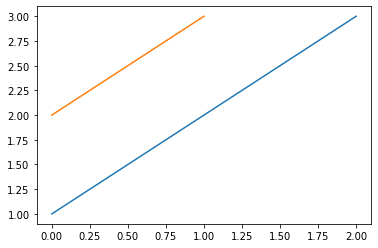

In [8]:
plt.plot([1,2,3])
plt.plot([2,3])